In [4]:
!pipenv install folium

Courtesy Notice: Pipenv found itself running within a virtual environment, so it will automatically use that environment, instead of creating its own for any project. You can set PIPENV_IGNORE_VIRTUALENVS=1 to force pipenv to ignore that environment and create its own instead. You can set PIPENV_VERBOSITY=-1 to suppress this warning.
Installing folium...
Resolving folium...
Added folium to Pipfile's [packages] ...
✔ Installation Succeeded...
⠋ Installing folium...
Pipfile.lock (2a04be) out of date, updating to (2a5e4f)...
Locking [packages] dependencies...
Building requirements...
Resolving dependencies...
✔ Success! Locking...
⠏ Locking...
Locking [dev-packages] dependencies...
Updated Pipfile.lock (890666d0cb45158e951a9eafc973f784be60ad80343128f60186c7554c2a5e4f)!
Installing dependencies from Pipfile.lock (2a5e4f)...
To activate this project's virtualenv, run pipenv shell.
Alternatively, run a command inside the virtualenv with pipenv run.


In [5]:
import pandas as pd
from datetime import datetime
import re
from collections import Counter
import plotly
from nltk.probability import FreqDist
import re
import pandas as pd

import folium
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from collections import Counter
import plotly.express as px
from nltk import FreqDist
import numpy as np
import seaborn as sns


## Reading dataset

In [6]:
file_path = 'all_job_postings_9517.csv'

df = pd.read_csv(file_path)

In [7]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  
0  Key Skills\nUnixLinuxStaffingTime managementPr...  
1  Key Skills\njQuerySilverlightMySQLSSRSJavascri...  
2  Key Skills\nSkills highlighted with ‘‘ are pre...  
3  Key Skills\nData analysisLeadership developmen...  
4  Key Skills\nData analysisWeb analyticsSocial m...

## Data Cleaning and Wrangling

#### Drop Duplicate Values

In [8]:
df = df.drop_duplicates()

#### Handling missing values

In [9]:
df.isnull().sum()

Job Title:             226
Company Name:          179
Job Location:            0
Job Experience           0
Job Salary               0
Job Stats                0
Job Description:         0
Industry Type:           0
Required Education:      0
Key Skills:              0
dtype: int64

In [10]:
# Filter rows where 'title' is null
null_title_rows = df[df['Job Title:'].isnull()]

#### Replace job titles of null value with the mode from dataset

In [11]:
# Since we are dealing with skills and job postings so company name is not important to keep so we discard company name column
# Since Job Title is categorical we are replacing null values with most common occuring job titles(mode)
mode_job_title = df['Job Title:'].mode()[0]
df['Job Title:'].fillna(mode_job_title, inplace=True)

In [12]:
df.isnull().sum()

Job Title:               0
Company Name:          179
Job Location:            0
Job Experience           0
Job Salary               0
Job Stats                0
Job Description:         0
Industry Type:           0
Required Education:      0
Key Skills:              0
dtype: int64

#### Replace "SQL" with "Sql" for extraction of texts based on First Capital letters 

In [13]:
df["Key Skills:"] = df["Key Skills:"].str.replace("SQL", "Sql")

#### Parse skills based on first capital letter to extract keywords

In [14]:
def split_skills(skills_string):
    skills_list = re.split(r'(?<=[a-z])(?=[A-Z])|\n', skills_string)
    # Filter out empty strings and whitespace
    skills_list = [skill.strip() for skill in skills_list if skill.strip()]
    return skills_list

# Remove "Key Skills\n" from skills string
df['Key Skills:'] = df['Key Skills:'].str.replace('Key Skills\n', '')
df['key_skills_seperated'] = df['Key Skills:'].apply(split_skills)

In [15]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   
3  Data analysisLeadership developmentCSRExcelNut...   
4  Data analysisWeb analyticsSocial mediaStrategi...   

                                key_skills_seperated  
0  [Unix, Linux, Staffing, Time management, Proje...  
1  [j, Query, Silverlight, My, Sql, SSRSJavascrip...  
2  [Skills highlighted with ‘‘ are preferred keys...  
3  [Data analysis, Leadership development, CSRExc...  
4  [Data analysis, Web analytics, Social media, S...

In [16]:
df.loc[0, 'key_skills_seperated']

['Unix',
 'Linux',
 'Staffing',
 'Time management',
 'Project management',
 'Analyticaldata visualization',
 'Bioinformatics',
 'Analytics',
 'Python']

#### Disregard any skills that their length are less than 3

In [17]:
# Function to filter strings with length >= 3
def filter_strings(strings):
    return [s for s in strings if len(s) >= 3]

# Apply the filtering function to the "Skills" column
df["key_skills_seperated"] = df["key_skills_seperated"].apply(filter_strings)

#### Add Column Date so we have data when the record was collected

In [18]:
df['Date'] = '2023-10-27'

In [19]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   
3  Data analysisLeadership developmentCSRExcelNut...   
4  Data analysisWeb analyticsSocial mediaStrategi...   

                                key_skills_seperated        Date  
0  [Unix, Linux, Staffing, Time management, Proje...  2023-10-27  
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...  2023-10-27  
2  [Skills highlighted with ‘‘ are preferred keys...  2023-10-27  
3  [Data analysis, Leadership development, CSRExc...  2023-10-27  
4  [Data analysis, Web analytics, Social media, S...  2023-10-27

In [20]:
df.describe()

Job Title:                      Company Name:  \
count             8116                               7937   
unique            4895                               3937   
top     Data Scientist  Coders Brain Pvt Ltd3.926 Reviews   
freq               497                                 63   

              Job Location: Job Experience     Job Salary  \
count                  8116           8116           8116   
unique                  856            148            302   
top     Bangalore/Bengaluru    2 - 5 years  Not Disclosed   
freq                   1547            466           7095   

                                                Job Stats  \
count                                                8116   
unique                                               4179   
top     Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
freq                                                  216   

                                         Job Description:  \
count                                                8116   
unique                                               7055   
top     Developing and directing software system valid...   
freq                                                   33   

                                           Industry Type:  \
count                                                8116   
unique                                               2854   
top     Role: Data Analyst\nIndustry Type: IT Services...   
freq                                                  242   

                                      Required Education:  \
count                                                8116   
unique                                                856   
top     Education\nUG: Any Graduate\nPG: Any Postgraduate   
freq                                                 4428   

                                              Key Skills:  \
count                                                8116   
unique                                               6818   
top     Help DeskCustomer Servicedata analysiscustomer...   
freq                                                   41   

                                     key_skills_seperated        Date  
count                                                8116        8116  
unique                                               6817           1  
top     [Help Desk, Customer Servicedata analysiscusto...  2023-10-27  
freq                                                   41        8116

In [21]:
# Step 1: Flatten the lists in the "Skills" column into a single list
all_skills = [skill for sublist in df["key_skills_seperated"] for skill in sublist]

# Step 2: Count the frequency of each string
skill_counts = Counter(all_skills)

In [22]:
len(skill_counts)

10725

In [23]:
count = sum(1 for value in skill_counts.values() if value == 1)

print(f"Number of keys with a value of 1: {count}")

Number of keys with a value of 1: 6389


In [24]:
count = sum(2 for value in skill_counts.values() if value == 2)

print(f"Number of keys with a value of 1: {count}")

Number of keys with a value of 1: 3788


In [25]:
10725 - 6389 - 3788

548

In [26]:
# Create a new dictionary with key-value pairs where the value is >= 3
filtered_dict = {key: value for key, value in skill_counts.items() if value >= 30}
filtered_counter = Counter(filtered_dict)

In [27]:
# Step 3: Get the top 10 most common strings
top_10_skills = filtered_counter.most_common(10)
bottom_10_skills = filtered_counter.most_common()[:-10:-1]
print("top_10_skills\n", top_10_skills)
print("bottom_10_skills\n", bottom_10_skills)

top_10_skills
 [('Data analysis', 2826), ('Skills highlighted with ‘‘ are preferred keyskills', 1993), ('Sql', 1803), ('Python', 1527), ('Analytical', 984), ('Analytics', 845), ('Monitoring', 614), ('Machine learning', 594), ('Excel', 459), ('Management', 447)]
bottom_10_skills
 [('Market intelligence', 30), ('MIS', 30), ('Investment banking', 30), ('Employee engagement', 30), ('MS Office Word', 30), ('Mining', 31), ('Google Ad', 31), ('Data Engineering', 31), ('MS Access', 31)]


In [28]:
# Remove outliers from skills based on human inception

keys_to_remove = ['Data analysis', 'Skills highlighted with ‘‘ are preferred keyskills', 'Analytical', 'Analytics', 'Monitoring', 'Management', 'Computer science', 'Mining', 'Google Ad', 'Instrumentation']

filtered_dict = Counter({key: value for key, value in filtered_counter.items() if key not in keys_to_remove})


In [29]:
# Step 3: Get the top 10 most common strings
top_10_skills = filtered_dict.most_common(10)
bottom_10_skills = filtered_dict.most_common()[:-10:-1]
print("top_10_skills\n", top_10_skills)
print("bottom_10_skills\n", bottom_10_skills)

top_10_skills
 [('Sql', 1803), ('Python', 1527), ('Machine learning', 594), ('Excel', 459), ('Project management', 428), ('Agile', 387), ('Automation', 364), ('Operations', 352), ('Data management', 346), ('MS Office', 346)]
bottom_10_skills
 [('Market intelligence', 30), ('MIS', 30), ('Investment banking', 30), ('Employee engagement', 30), ('MS Office Word', 30), ('Data Engineering', 31), ('MS Access', 31), ('Data Warehousing', 31), ('Six sigma', 31)]


#### Extract Applicant Counts as seperate column in DF

In [30]:
# Function to extract Applicants count or return "0"
def extract_applicants(description):
    if "Applicants:" in description:
        return description.split("Applicants:")[1].strip()
    else:
        return "0"

In [31]:
# Apply the function to the "Description" column and create a new column "ApplicantsCount"
df['applicants_count'] = df['Job Stats'].apply(extract_applicants)

In [32]:
df.head()

Job Title:  \
0                         Sr. Data Scientist   
1                          Software Engineer   
2                  Data Analyst - WealthTech   
3  Project Associate - Public Health and CSR   
4                 Senior Marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            Skillety  Bangalore/Bengaluru  10 - 15 years   
1       Talent Software4.1120 Reviews  Bangalore/Bengaluru    2 - 4 years   
2                Mithra HR Consulting         Mumbai, Pune    3 - 7 years   
3  Renalysis Consultants2.310 Reviews                 Pune    1 - 2 years   
4                             Mechuni  Bangalore/Bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 39   
1  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
2  Not Disclosed              Posted: 29 days ago\nApplicants: 1161   
3  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
4  Not Disclosed  Posted: 30+ days ago\nOpenings: 1\nApplicants: 96   

                                    Job Description:  \
0  Strong R/Python programming skills and work ex...   
1  Translate application storyboards and use case...   
2  Data Analyst - WealthTech\n\nRole : Data Analy...   
3  Support the development and implementation of ...   
4  We are looking for a Senior Marketing Executiv...   

                                      Industry Type:  \
0  Role: Data Scientist\nIndustry Type: Recruitme...   
1  Role: Full Stack Developer\nIndustry Type: IT ...   
2  Role: Data Analyst\nIndustry Type: Management ...   
3  Role: Other\nIndustry Type: Management Consult...   
4  Role: Marketing Manager\nIndustry Type: Intern...   

                                 Required Education:  \
0  Education\nUG: Any Graduate\nPG: Any Postgraduate   
1  Education\nUG: Any Graduate\nPG: Any Postgraduate   
2  Education\nUG: Any Graduate\nPG: MBA/PGDM in F...   
3  Education\nUG: Any Graduate\nPG: Any Postgraduate   
4  Education\nUG: B.B.A/ B.M.S in Management\nPG:...   

                                         Key Skills:  \
0  UnixLinuxStaffingTime managementProject manage...   
1  jQuerySilverlightMySqlSSRSJavascriptPHPWCFWPFS...   
2  Skills highlighted with ‘‘ are preferred keysk...   
3  Data analysisLeadership developmentCSRExcelNut...   
4  Data analysisWeb analyticsSocial mediaStrategi...   

                                key_skills_seperated        Date  \
0  [Unix, Linux, Staffing, Time management, Proje...  2023-10-27   
1  [Query, Silverlight, Sql, SSRSJavascript, PHPW...  2023-10-27   
2  [Skills highlighted with ‘‘ are preferred keys...  2023-10-27   
3  [Data analysis, Leadership development, CSRExc...  2023-10-27   
4  [Data analysis, Web analytics, Social media, S...  2023-10-27   

  applicants_count  
0               39  
1              118  
2             1161  
3              165  
4               96

In [33]:
df.describe()

Job Title:                      Company Name:  \
count             8116                               7937   
unique            4895                               3937   
top     Data Scientist  Coders Brain Pvt Ltd3.926 Reviews   
freq               497                                 63   

              Job Location: Job Experience     Job Salary  \
count                  8116           8116           8116   
unique                  856            148            302   
top     Bangalore/Bengaluru    2 - 5 years  Not Disclosed   
freq                   1547            466           7095   

                                                Job Stats  \
count                                                8116   
unique                                               4179   
top     Posted: 30+ days ago\nOpenings: 1\nApplicants:...   
freq                                                  216   

                                         Job Description:  \
count                                                8116   
unique                                               7055   
top     Developing and directing software system valid...   
freq                                                   33   

                                           Industry Type:  \
count                                                8116   
unique                                               2854   
top     Role: Data Analyst\nIndustry Type: IT Services...   
freq                                                  242   

                                      Required Education:  \
count                                                8116   
unique                                                856   
top     Education\nUG: Any Graduate\nPG: Any Postgraduate   
freq                                                 4428   

                                              Key Skills:  \
count                                                8116   
unique                                               6818   
top     Help DeskCustomer Servicedata analysiscustomer...   
freq                                                   41   

                                     key_skills_seperated        Date  \
count                                                8116        8116   
unique                                               6817           1   
top     [Help Desk, Customer Servicedata analysiscusto...  2023-10-27   
freq                                                   41        8116   

       applicants_count  
count              8116  
unique             1608  
top        Less than 10  
freq                377

#### Lower casing all the data in our DF

In [34]:
df = df.apply(lambda x: x.astype(str).str.lower())

In [35]:
df['Job Title:'].nunique()

4781

In [36]:
# Define a function to replace "sr" and "sr." with "senior"
def replace_sr(text):
    return text.replace("sr", "senior").replace("sr.", "senior")

# Apply the function to the DataFrame using applymap
df['Job Title:'] = df['Job Title:'].apply(replace_sr)

In [37]:
df.head()

Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 39   
1  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
2  not disclosed              posted: 29 days ago\napplicants: 1161   
3  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
4  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 96   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                      Industry Type:  \
0  role: data scientist\nindustry type: recruitme...   
1  role: full stack developer\nindustry type: it ...   
2  role: data analyst\nindustry type: management ...   
3  role: other\nindustry type: management consult...   
4  role: marketing manager\nindustry type: intern...   

                                 Required Education:  \
0  education\nug: any graduate\npg: any postgraduate   
1  education\nug: any graduate\npg: any postgraduate   
2  education\nug: any graduate\npg: mba/pgdm in f...   
3  education\nug: any graduate\npg: any postgraduate   
4  education\nug: b.b.a/ b.m.s in management\npg:...   

                                         Key Skills:  \
0  unixlinuxstaffingtime managementproject manage...   
1  jquerysilverlightmysqlssrsjavascriptphpwcfwpfs...   
2  skills highlighted with ‘‘ are preferred keysk...   
3  data analysisleadership developmentcsrexcelnut...   
4  data analysisweb analyticssocial mediastrategi...   

                                key_skills_seperated        Date  \
0  ['unix', 'linux', 'staffing', 'time management...  2023-10-27   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...  2023-10-27   
2  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
3  ['data analysis', 'leadership development', 'c...  2023-10-27   
4  ['data analysis', 'web analytics', 'social med...  2023-10-27   

  applicants_count  
0               39  
1              118  
2             1161  
3              165  
4               96

In [38]:
# After lowercasing
contains_data_analyst_scientist = df['Job Title:'].str.contains('data analyst|data scientist', case=False, regex=True)

# Count the occurrences of 'data analyst' or 'data scientist'
count_data_analyst_scientist = contains_data_analyst_scientist.value_counts()

In [39]:
count_data_analyst_scientist

Job Title:
False    6735
True     1381
Name: count, dtype: int64

In [40]:
df.tail()

Job Title:  \
8969                          procurement manager   
8970    data visualization analyst - trai , delhi   
8972                                mis executive   
8974                                      manager   
8975  senior. process associate - purchase to pay   

                                          Company Name:        Job Location:  \
8969                     ks smart solutions4.73 reviews              chennai   
8970  national institute for smart government (nisg)...          delhi / ncr   
8972                              right step consulting              gurgaon   
8974                       grant thornton3.7608 reviews     gurgaon/gurugram   
8975                             siemens4.23944 reviews  bangalore/bengaluru   

     Job Experience      Job Salary  \
8969    5 - 8 years   not disclosed   
8970   6 - 11 years  7-17 lacs p.a.   
8972    0 - 2 years   not disclosed   
8974   7 - 11 years   not disclosed   
8975    2 - 3 years   not disclosed   

                                              Job Stats  \
8969              posted: 30+ days ago\napplicants: 555   
8970    posted: 1 day ago\nopenings: 1\napplicants: 238   
8972  posted: 30+ days ago\nopenings: 1\napplicants:...   
8974  posted: 30+ days ago\nopenings: 1\napplicants:...   
8975  posted: 30+ days ago\nopenings: 1\napplicants: 71   

                                       Job Description:  \
8969  job description:\ndevise and use productive so...   
8970  data visualization analyst (data scientist)\n\...   
8972  brief role : job description\n\nmaintaining mi...   
8974  roles and responsibilities:\npart of valuation...   
8975  understand business requirements in bi context...   

                                         Industry Type:  \
8969  role: procurement / purchase manager\nindustry...   
8970  role: data science & analytics - other\nindust...   
8972  role: non tech support - non voice\nindustry t...   
8974  role: bfsi, investments & trading - other\nind...   
8975  role: data analyst\nindustry type: industrial ...   

                                    Required Education:  \
8969  education\nug: b.sc in any specialization, b.b...   
8970  education\nug: b.tech/b.e. in any specializati...   
8972  education\nug: any graduate\npg: post graduati...   
8974  education\nug: any graduate\npg: ca in ca, mba...   
8975  education\nug: any graduate\npg: any postgraduate   

                                            Key Skills:  \
8969  skills highlighted with ‘‘ are preferred keysk...   
8970  skills highlighted with ‘‘ are preferred keysk...   
8972  bpoaccountancytallyanalyticalback officefmcgkp...   
8974  valuation analysisdata analysisinterpersonal s...   
8975  process associateautomationdata sciencedata re...   

                                   key_skills_seperated        Date  \
8969  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
8970  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
8972  ['bpoaccountancy', 'tally', 'analytical', 'bac...  2023-10-27   
8974  ['valuation analysis', 'data analysis', 'inter...  2023-10-27   
8975  ['process associate', 'automationdata scienced...  2023-10-27   

     applicants_count  
8969              555  
8970              238  
8972              829  
8974              246  
8975               71

In [41]:
df['Job Salary'].value_counts()['not disclosed']

7095

In [38]:
# So we need to drop the Job Salary Column as it doesnt add information and most values are not disclosed(will be done in later cells)

In [42]:
df.describe()

Job Title: Company Name:        Job Location: Job Experience  \
count             8116          8116                 8116           8116   
unique            4770          3930                  856            148   
top     data scientist           nan  bangalore/bengaluru    2 - 5 years   
freq               507           179                 1547            466   

           Job Salary                                          Job Stats  \
count            8116                                               8116   
unique            302                                               4179   
top     not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
freq             7095                                                216   

                                         Job Description:  \
count                                                8116   
unique                                               7055   
top     developing and directing software system valid...   
freq                                                   33   

                                           Industry Type:  \
count                                                8116   
unique                                               2854   
top     role: data analyst\nindustry type: it services...   
freq                                                  242   

                                      Required Education:  \
count                                                8116   
unique                                                856   
top     education\nug: any graduate\npg: any postgraduate   
freq                                                 4428   

                                              Key Skills:  \
count                                                8116   
unique                                               6813   
top     help deskcustomer servicedata analysiscustomer...   
freq                                                   41   

                                     key_skills_seperated        Date  \
count                                                8116        8116   
unique                                               6813           1   
top     ['help desk', 'customer servicedata analysiscu...  2023-10-27   
freq                                                   41        8116   

       applicants_count  
count              8116  
unique             1608  
top        less than 10  
freq                377

## Data Analysis1

#### 1.1 Job Title Analysis

In [43]:
# Analysis 1 : finding the top 10 job titles 
top_10_job_titles = df['Job Title:'].value_counts().head(10)

print(top_10_job_titles)

Job Title:
data scientist           507
data analyst             248
mis executive            157
data engineer            135
business analyst          98
senior data scientist     54
marketing executive       38
senior data engineer      37
full stack developer      37
senior data analyst       35
Name: count, dtype: int64


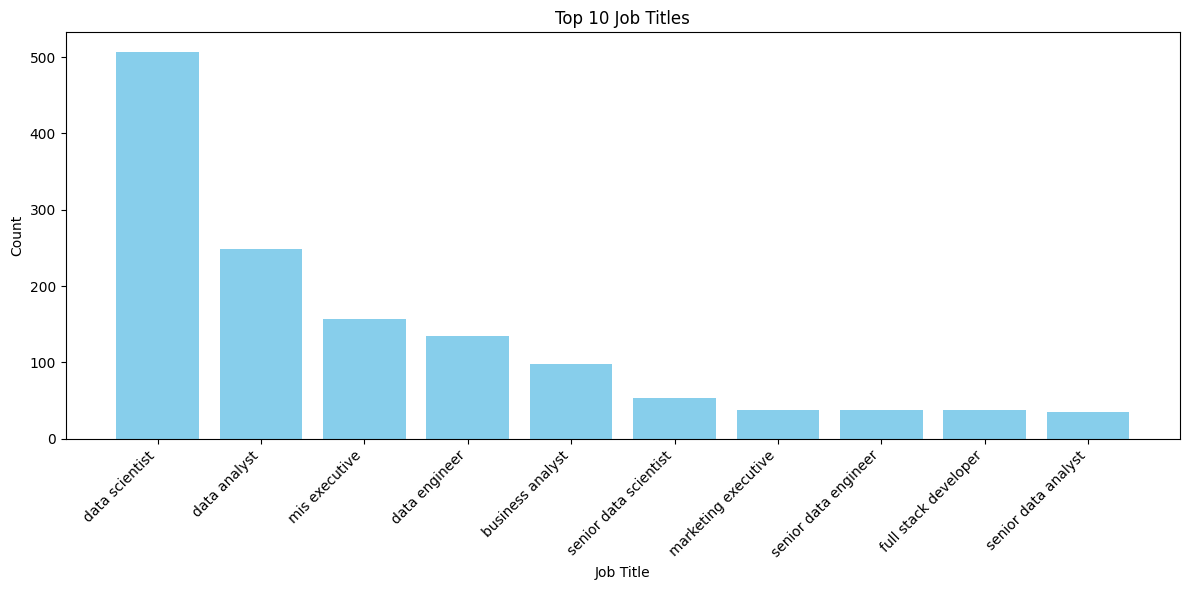

In [44]:
def bar_plot(x, y, x_label, title):
    plt.figure(figsize=(12, 6)) 
    plt.bar(x, y, color='skyblue')
    plt.xlabel(x_label)
    plt.ylabel('Count')
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
bar_plot(top_10_job_titles.index, top_10_job_titles.values, 'Job Title', 'Top 10 Job Titles')

#### 1.2. Job Experience Analysis

In [45]:
# Function to preprocess 'Job Experience' values and calculate the average
def preprocess_experience(experience):
    try:
        # Check if the value is "no fixed duration"
        if experience == "no fixed duration":
            return None  # Assign a special value, such as None or NaN, to represent the lack of fixed duration
        
        # Remove 'years' and split the range
        exp_range = experience.replace(' years', '').split(' - ')
        
        # Calculate the average of the range
        avg_experience = (float(exp_range[0]) + float(exp_range[1])) / 2
        
        return avg_experience
    except (ValueError, IndexError):
        return None  # Handle unexpected values or errors

# Apply the function to create a new column 'Experience (years)'
df['Average Experience (years)'] = df['Job Experience'].apply(preprocess_experience)

# Print the DataFrame with the new column
df.head()


Job Title:  \
0                         senior. data scientist   
1                              software engineer   
2                      data analyst - wealthtech   
3  project associate - public health and csenior   
4                     senior marketing executive   

                        Company Name:        Job Location: Job Experience  \
0                            skillety  bangalore/bengaluru  10 - 15 years   
1       talent software4.1120 reviews  bangalore/bengaluru    2 - 4 years   
2                mithra hr consulting         mumbai, pune    3 - 7 years   
3  renalysis consultants2.310 reviews                 pune    1 - 2 years   
4                             mechuni  bangalore/bengaluru    1 - 4 years   

      Job Salary                                          Job Stats  \
0  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 39   
1  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
2  not disclosed              posted: 29 days ago\napplicants: 1161   
3  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants:...   
4  not disclosed  posted: 30+ days ago\nopenings: 1\napplicants: 96   

                                    Job Description:  \
0  strong r/python programming skills and work ex...   
1  translate application storyboards and use case...   
2  data analyst - wealthtech\n\nrole : data analy...   
3  support the development and implementation of ...   
4  we are looking for a senior marketing executiv...   

                                      Industry Type:  \
0  role: data scientist\nindustry type: recruitme...   
1  role: full stack developer\nindustry type: it ...   
2  role: data analyst\nindustry type: management ...   
3  role: other\nindustry type: management consult...   
4  role: marketing manager\nindustry type: intern...   

                                 Required Education:  \
0  education\nug: any graduate\npg: any postgraduate   
1  education\nug: any graduate\npg: any postgraduate   
2  education\nug: any graduate\npg: mba/pgdm in f...   
3  education\nug: any graduate\npg: any postgraduate   
4  education\nug: b.b.a/ b.m.s in management\npg:...   

                                         Key Skills:  \
0  unixlinuxstaffingtime managementproject manage...   
1  jquerysilverlightmysqlssrsjavascriptphpwcfwpfs...   
2  skills highlighted with ‘‘ are preferred keysk...   
3  data analysisleadership developmentcsrexcelnut...   
4  data analysisweb analyticssocial mediastrategi...   

                                key_skills_seperated        Date  \
0  ['unix', 'linux', 'staffing', 'time management...  2023-10-27   
1  ['query', 'silverlight', 'sql', 'ssrsjavascrip...  2023-10-27   
2  ['skills highlighted with ‘‘ are preferred key...  2023-10-27   
3  ['data analysis', 'leadership development', 'c...  2023-10-27   
4  ['data analysis', 'web analytics', 'social med...  2023-10-27   

  applicants_count  Average Experience (years)  
0               39                        12.5  
1              118                         3.0  
2             1161                         5.0  
3              165                         1.5  
4               96                         2.5

In [46]:
# Counting the top 10 average job experiences
top_10_avg_experiences = df['Average Experience (years)'].value_counts().nlargest(10)

# Printing the count of the top 10 average job experiences
print("Top 10 Average Job Experiences:")
print(top_10_avg_experiences)

Top 10 Average Job Experiences:
Average Experience (years)
3.5    743
4.0    698
4.5    663
5.5    551
3.0    495
7.5    490
6.5    476
2.5    470
2.0    441
5.0    400
Name: count, dtype: int64


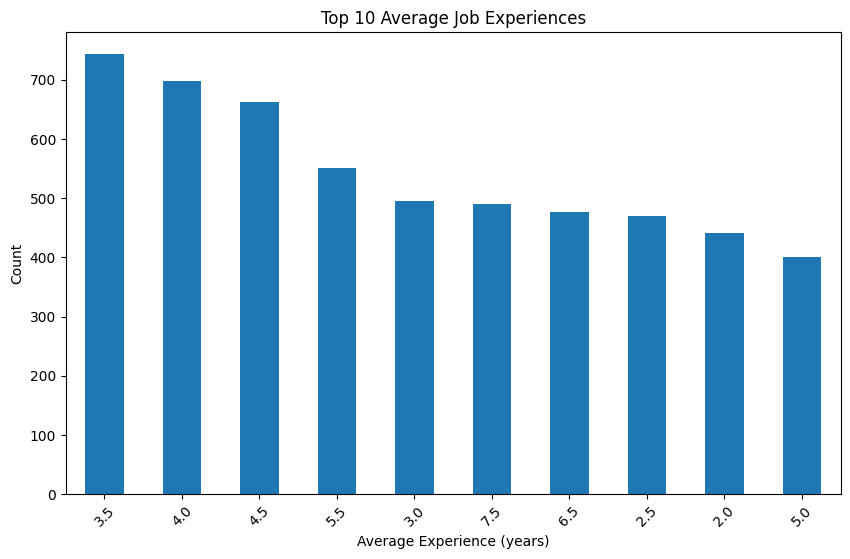

In [47]:
# Plotting the top 10 average job experiences in a bar chart
plt.figure(figsize=(10, 6))
top_10_avg_experiences.plot(kind='bar')
plt.xlabel('Average Experience (years)')
plt.ylabel('Count')
plt.title('Top 10 Average Job Experiences')
plt.xticks(rotation=45)
plt.show()

#### 1.3. Job Location Analysis

In [48]:
def preprocess_location(loc):
    loc=re.split('\(', loc)[0].strip()
    loc=re.sub('New Delhi','Delhi',loc)
    return loc

In [49]:
## top 10 job locations

# splitting values and saving into a list
loc=df['Job Location:'].tolist()
loc=[j.strip() for i in [j.strip() for i in loc for j in i.split(',')] for j in i.split('/')]

# count
fdist = FreqDist(loc)
loc_df=pd.DataFrame(list(dict(fdist).items()), columns=['location', 'job openings'])

# removing alternate names
for loc in ['bengaluru','secunderabad','cochin','ncr','gurugram']:
    loc_df=loc_df[loc_df['location']!=loc]
    
# applying function
loc_df['location']=loc_df['location'].apply(preprocess_location)
loc_df=loc_df.groupby('location').sum().reset_index(level=0)

# top 10 locations
loc_df=loc_df.sort_values(by='job openings',ascending=False)[:10]
loc_df.style.background_gradient(cmap='mako_r')

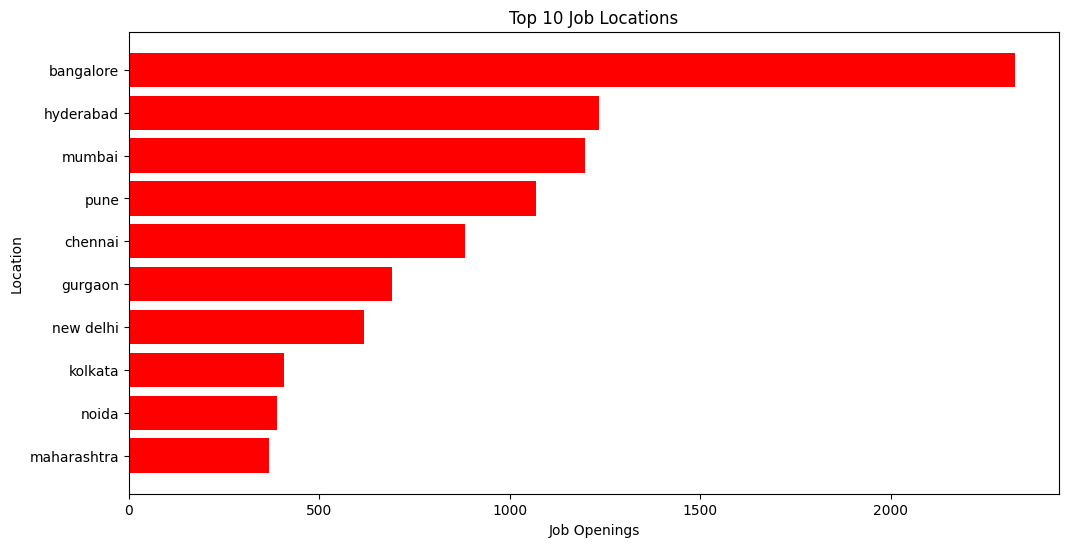

In [50]:
plt.figure(figsize=(12, 6))
plt.barh(loc_df['location'], loc_df['job openings'], color='red')
plt.xlabel('Job Openings')
plt.ylabel('Location')
plt.title('Top 10 Job Locations')
plt.gca().invert_yaxis()  
plt.show()

In [51]:
loc_df['location'][:5]

53     bangalore
198    hyderabad
329       mumbai
394         pune
113      chennai
Name: location, dtype: object

In [52]:
# Function to segregate locations
def segregate_locations(location):
    locations = location.split(', ')
    if len(locations) == 1:
        return locations[0], None  # Single Location
    else:
        return None, ', '.join(locations)  # Mixed Locations


df['Single Location'], df['Mixed Locations'] = zip(*df['Job Location:'].apply(segregate_locations))

City: bangalore/bengaluru
Data Scientist Jobs: 214
Data Analyst Jobs: 110

City: hyderabad/secunderabad
Data Scientist Jobs: 74
Data Analyst Jobs: 61

City: mumbai
Data Scientist Jobs: 47
Data Analyst Jobs: 46

City: pune
Data Scientist Jobs: 54
Data Analyst Jobs: 40

City: chennai
Data Scientist Jobs: 49
Data Analyst Jobs: 29



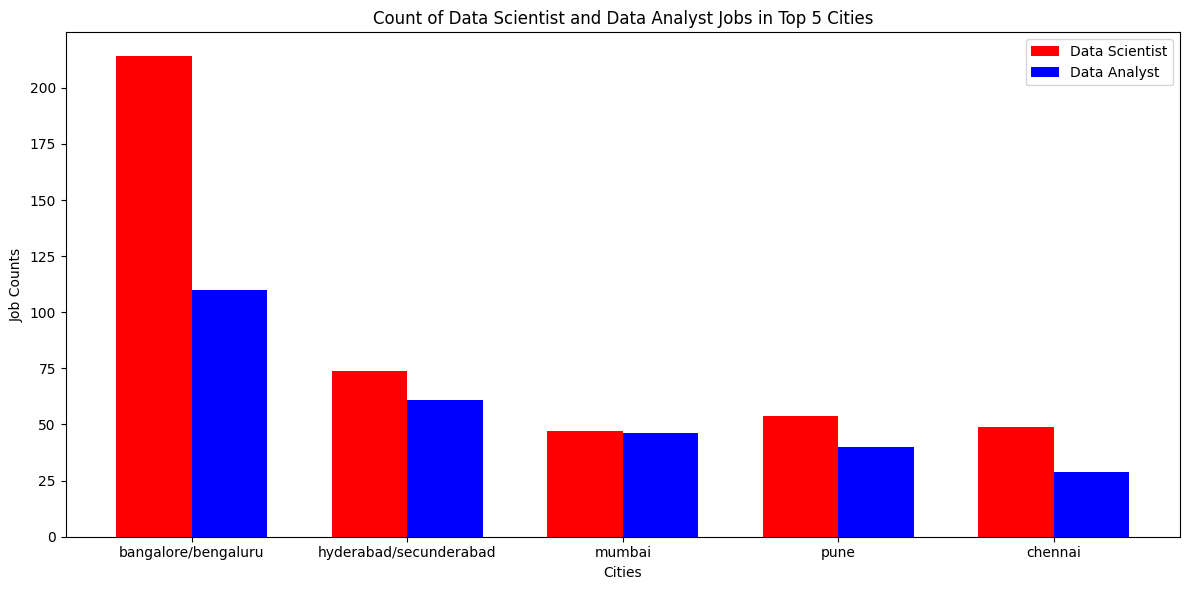

In [53]:
# top 5 cities
top_5_cities = ['bangalore/bengaluru', 'hyderabad/secunderabad', 'mumbai', 'pune', 'chennai']

city_job_counts = {}

for city in top_5_cities:
    city_data = df[df['Single Location'] == city]
    data_scientist_count = city_data['Job Title:'].str.lower().str.contains('data scientist').sum()
    data_analyst_count = city_data['Job Title:'].str.lower().str.contains('data analyst').sum()
    
    city_job_counts[city] = {'Data Scientist': data_scientist_count, 'Data Analyst': data_analyst_count}

for city, counts in city_job_counts.items():
    print(f"City: {city}")
    print("Data Scientist Jobs:", counts['Data Scientist'])
    print("Data Analyst Jobs:", counts['Data Analyst'])
    print()


cities = top_5_cities
data_scientist_counts = [city_job_counts[city]['Data Scientist'] for city in top_5_cities]
data_analyst_counts = [city_job_counts[city]['Data Analyst'] for city in top_5_cities]
bar_width = 0.35
index = np.arange(len(cities))


plt.figure(figsize=(12, 6))
plt.bar(index, data_scientist_counts, bar_width, label='Data Scientist', align='center',color ='red')
plt.bar(index + bar_width, data_analyst_counts, bar_width, label='Data Analyst', align='center',color='blue')
plt.xlabel('Cities')
plt.ylabel('Job Counts')
plt.title('Count of Data Scientist and Data Analyst Jobs in Top 5 Cities')
plt.xticks(index + bar_width / 2, cities)
plt.legend()


plt.tight_layout()
plt.show()

Single loctions : 6860
Multiple locations : 1256


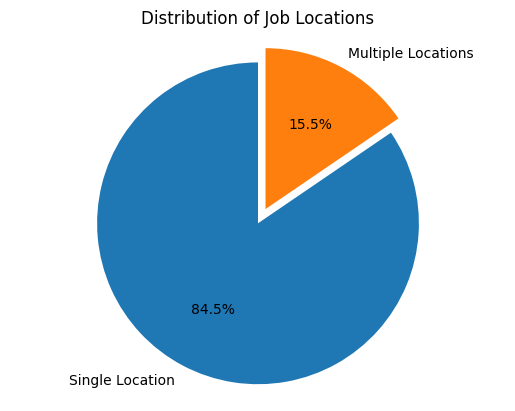

In [54]:
# Analysis 3 : Analyzing the distribution of job locations, both single and mixed, to identify popular work areas.

# Single location job postings
single_location_count = df['Single Location'].count()

# Mixed location job postings
mixed_location_count = df['Mixed Locations'].count()

print('Single loctions :',single_location_count)
print('Multiple locations :',mixed_location_count)

# Plotting the distribution of single and mixed locations
explode = (0, 0.1)
labels = ['Single Location', 'Multiple Locations']
sizes = [single_location_count, mixed_location_count]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90,explode=explode)
plt.axis('equal')
plt.title('Distribution of Job Locations')
plt.show()

In [55]:
import folium
# latitude and longitude of the locations
lat=[12.9716,18.5204,17.3850,19.0760,13.0827,28.4595,28.6139,28.5355,22.5726,23.0225]
lon=[77.5946,73.8567,78.4867,72.8777,80.2707,77.0266,77.2090,77.3910,88.3639,72.5714]

df1=loc_df.copy()
df1['lat']=lat
df1['lon']=lon

# title
loc = 'Top 10 Job Locations'
title_html = '''
             <h3 align="center" style="font-size:20px"><b>{}</b></h3>
             '''.format(loc)

# creating map
m = folium.Map(location=[20,78], tiles="OpenStreetMap", zoom_start=4.5)
m.get_root().html.add_child(folium.Element(title_html))
    
for i in range(0,len(df1)):
    # marking each location
    folium.Marker(
        location=[df1.iloc[i]['lat'], df1.iloc[i]['lon']],
        popup=f"{df1.iloc[i]['location']} - Counts: {df1.iloc[i]['job openings']}",
        icon=folium.Icon(icon='info-sign', color="red"),
        draggable=False
   ).add_to(m)

# Show the map
m

#### 1.4. Extract top 10 skills based on the whole data in DF

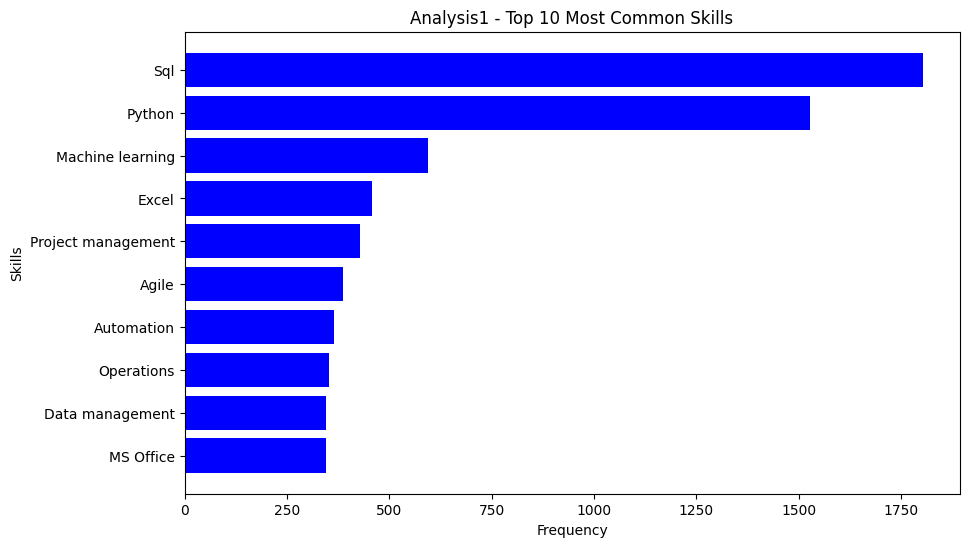

In [56]:
# Extract the skill names and their counts
skill_names, skill_counts = zip(*top_10_skills)

# Bar plot
plt.figure(figsize=(10, 6))
plt.barh(skill_names, skill_counts, color='blue')
plt.xlabel('Frequency')
plt.ylabel('Skills')
plt.title('Analysis1 - Top 10 Most Common Skills')
plt.gca().invert_yaxis()  
plt.show()

#### 1.5. Finding 10 top Job Roles, Industry Type, Department in Data Science Jobs

In [57]:
dfs = {}
def columns_top_10_value_gradient_table(column_name, axis_name, top, cmap):
    df_name = f'{column_name}_{top}_job_10'  
    if top == "most":
        dfs[df_name] = pd.DataFrame(df[column_name].value_counts()[:10].rename_axis(axis_name).reset_index(name='Count'))
    elif top == "least":
        dfs[df_name] = pd.DataFrame(df[column_name].value_counts()[-10:].rename_axis(axis_name).reset_index(name='Count'))
    dfs[df_name]['percentage'] = dfs[df_name]['Count']/ sum(dfs[df_name]['Count'])
    
    return dfs[df_name].style.background_gradient(cmap=cmap)

#### Expand Industry Type and Education to separate columns (This is part of preprocessing but It must be done after first analysis since it would change the structure of df)

In [58]:
# Function to parse the "DataString" column into a dictionary
def parse_to_dict(data_string):
    data_dict = {}
    lines = data_string.split('\n')
    for line in lines:
        if ":" in line:
            key, value = line.split(': ', 1)
            data_dict[key] = value
    return data_dict

# Apply the parsing function to the "Industry Type" and "Required Education" column and create a new column "DataDict"
df['IndustryTypeDict'] = df['Industry Type:'].apply(parse_to_dict)

# Remove "Education\n" from Required Education string
df['Required Education:'] = df['Required Education:'].str.replace('Education\n', '')
df['EducationDict'] = df['Required Education:'].apply(parse_to_dict)

In [59]:
# List of column names to drop
columns_to_drop = ['Company Name:', 'Job Salary', 'Job Description:', 'Key Skills:', 'Date', 'Job Stats', 'Industry Type:', 'Required Education:']

# Drop the specified columns by name
df = df.drop(columns_to_drop, axis=1)

In [60]:
# Expand "IndustryTypeDict" and "EducationDict" Dictionary Columns as seperate columns in Our df
def expand_dict_column(input_df, column_name):
    df = pd.concat([input_df.drop([column_name], axis=1), input_df[column_name].apply(pd.Series)], axis=1)
    return df

In [61]:
# Apply the function to the "EducationDict" and "IndustryTypeDict" columns
df = expand_dict_column(df, "EducationDict")
df = expand_dict_column(df, "IndustryTypeDict")
df.head()


Job Title:        Job Location:  \
0                         senior. data scientist  bangalore/bengaluru   
1                              software engineer  bangalore/bengaluru   
2                      data analyst - wealthtech         mumbai, pune   
3  project associate - public health and csenior                 pune   
4                     senior marketing executive  bangalore/bengaluru   

  Job Experience                               key_skills_seperated  \
0  10 - 15 years  ['unix', 'linux', 'staffing', 'time management...   
1    2 - 4 years  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2    3 - 7 years  ['skills highlighted with ‘‘ are preferred key...   
3    1 - 2 years  ['data analysis', 'leadership development', 'c...   
4    1 - 4 years  ['data analysis', 'web analytics', 'social med...   

  applicants_count  Average Experience (years)      Single Location  \
0               39                        12.5  bangalore/bengaluru   
1              118                         3.0  bangalore/bengaluru   
2             1161                         5.0                 None   
3              165                         1.5                 pune   
4               96                         2.5  bangalore/bengaluru   

  Mixed Locations                          ug                     pg  \
0            None                any graduate       any postgraduate   
1            None                any graduate       any postgraduate   
2    mumbai, pune                any graduate    mba/pgdm in finance   
3            None                any graduate       any postgraduate   
4            None  b.b.a/ b.m.s in management  mba/pgdm in marketing   

                doctorate                  role             industry type  \
0                     NaN        data scientist    recruitment / staffing   
1                     NaN  full stack developer  it services & consulting   
2  doctorate not required          data analyst     management consulting   
3                     NaN                 other     management consulting   
4                     NaN     marketing manager                  internet   

                    department       employment type  \
0     data science & analytics  full time, permanent   
1  engineering - software & qa  full time, permanent   
2     data science & analytics  full time, permanent   
3                        other  full time, permanent   
4    marketing & communication  full time, permanent   

                       role category  
0    data science & machine learning  
1               software development  
2  business intelligence & analytics  
3                              other  
4                          marketing

In [62]:
df.columns

Index(['Job Title:', 'Job Location:', 'Job Experience', 'key_skills_seperated',
       'applicants_count', 'Average Experience (years)', 'Single Location',
       'Mixed Locations', 'ug', 'pg', 'doctorate', 'role', 'industry type',
       'department', 'employment type', 'role category'],
      dtype='object')

In [63]:
df.head()

Job Title:        Job Location:  \
0                         senior. data scientist  bangalore/bengaluru   
1                              software engineer  bangalore/bengaluru   
2                      data analyst - wealthtech         mumbai, pune   
3  project associate - public health and csenior                 pune   
4                     senior marketing executive  bangalore/bengaluru   

  Job Experience                               key_skills_seperated  \
0  10 - 15 years  ['unix', 'linux', 'staffing', 'time management...   
1    2 - 4 years  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2    3 - 7 years  ['skills highlighted with ‘‘ are preferred key...   
3    1 - 2 years  ['data analysis', 'leadership development', 'c...   
4    1 - 4 years  ['data analysis', 'web analytics', 'social med...   

  applicants_count  Average Experience (years)      Single Location  \
0               39                        12.5  bangalore/bengaluru   
1              118                         3.0  bangalore/bengaluru   
2             1161                         5.0                 None   
3              165                         1.5                 pune   
4               96                         2.5  bangalore/bengaluru   

  Mixed Locations                          ug                     pg  \
0            None                any graduate       any postgraduate   
1            None                any graduate       any postgraduate   
2    mumbai, pune                any graduate    mba/pgdm in finance   
3            None                any graduate       any postgraduate   
4            None  b.b.a/ b.m.s in management  mba/pgdm in marketing   

                doctorate                  role             industry type  \
0                     NaN        data scientist    recruitment / staffing   
1                     NaN  full stack developer  it services & consulting   
2  doctorate not required          data analyst     management consulting   
3                     NaN                 other     management consulting   
4                     NaN     marketing manager                  internet   

                    department       employment type  \
0     data science & analytics  full time, permanent   
1  engineering - software & qa  full time, permanent   
2     data science & analytics  full time, permanent   
3                        other  full time, permanent   
4    marketing & communication  full time, permanent   

                       role category  
0    data science & machine learning  
1               software development  
2  business intelligence & analytics  
3                              other  
4                          marketing

In [64]:
columns_top_10_value_gradient_table('role', 'Job Role','most', 'Greys')

In [65]:
columns_top_10_value_gradient_table('industry type', 'Industry Type', 'most', 'Greys')

In [66]:
columns_top_10_value_gradient_table('industry type', 'Industry Type', 'least', 'Blues')

In [67]:
columns_top_10_value_gradient_table('department', 'Department', 'most', 'Greys')

In [68]:
columns_top_10_value_gradient_table('department', 'Department', 'least', 'Blues')

In [69]:
dfs

{'role_most_job_10':                                   Job Role  Count  percentage
 0                             data analyst    807    0.226877
 1                           data scientist    487    0.136913
 2             software development - other    387    0.108800
 3                         business analyst    363    0.102052
 4                            data engineer    358    0.100647
 5                                    other    351    0.098679
 6                            mis executive    268    0.075344
 7                       back end developer    233    0.065505
 8         data science & analytics - other    161    0.045263
 9  data science & machine learning - other    142    0.039921,
 'industry type_most_job_10':                     Industry Type  Count  percentage
 0        it services & consulting   2559    0.503344
 1          recruitment / staffing    573    0.112707
 2           management consulting    331    0.065106
 3                         banking    318

#### 1.6. Analysis of top 10 job roles and their required skills

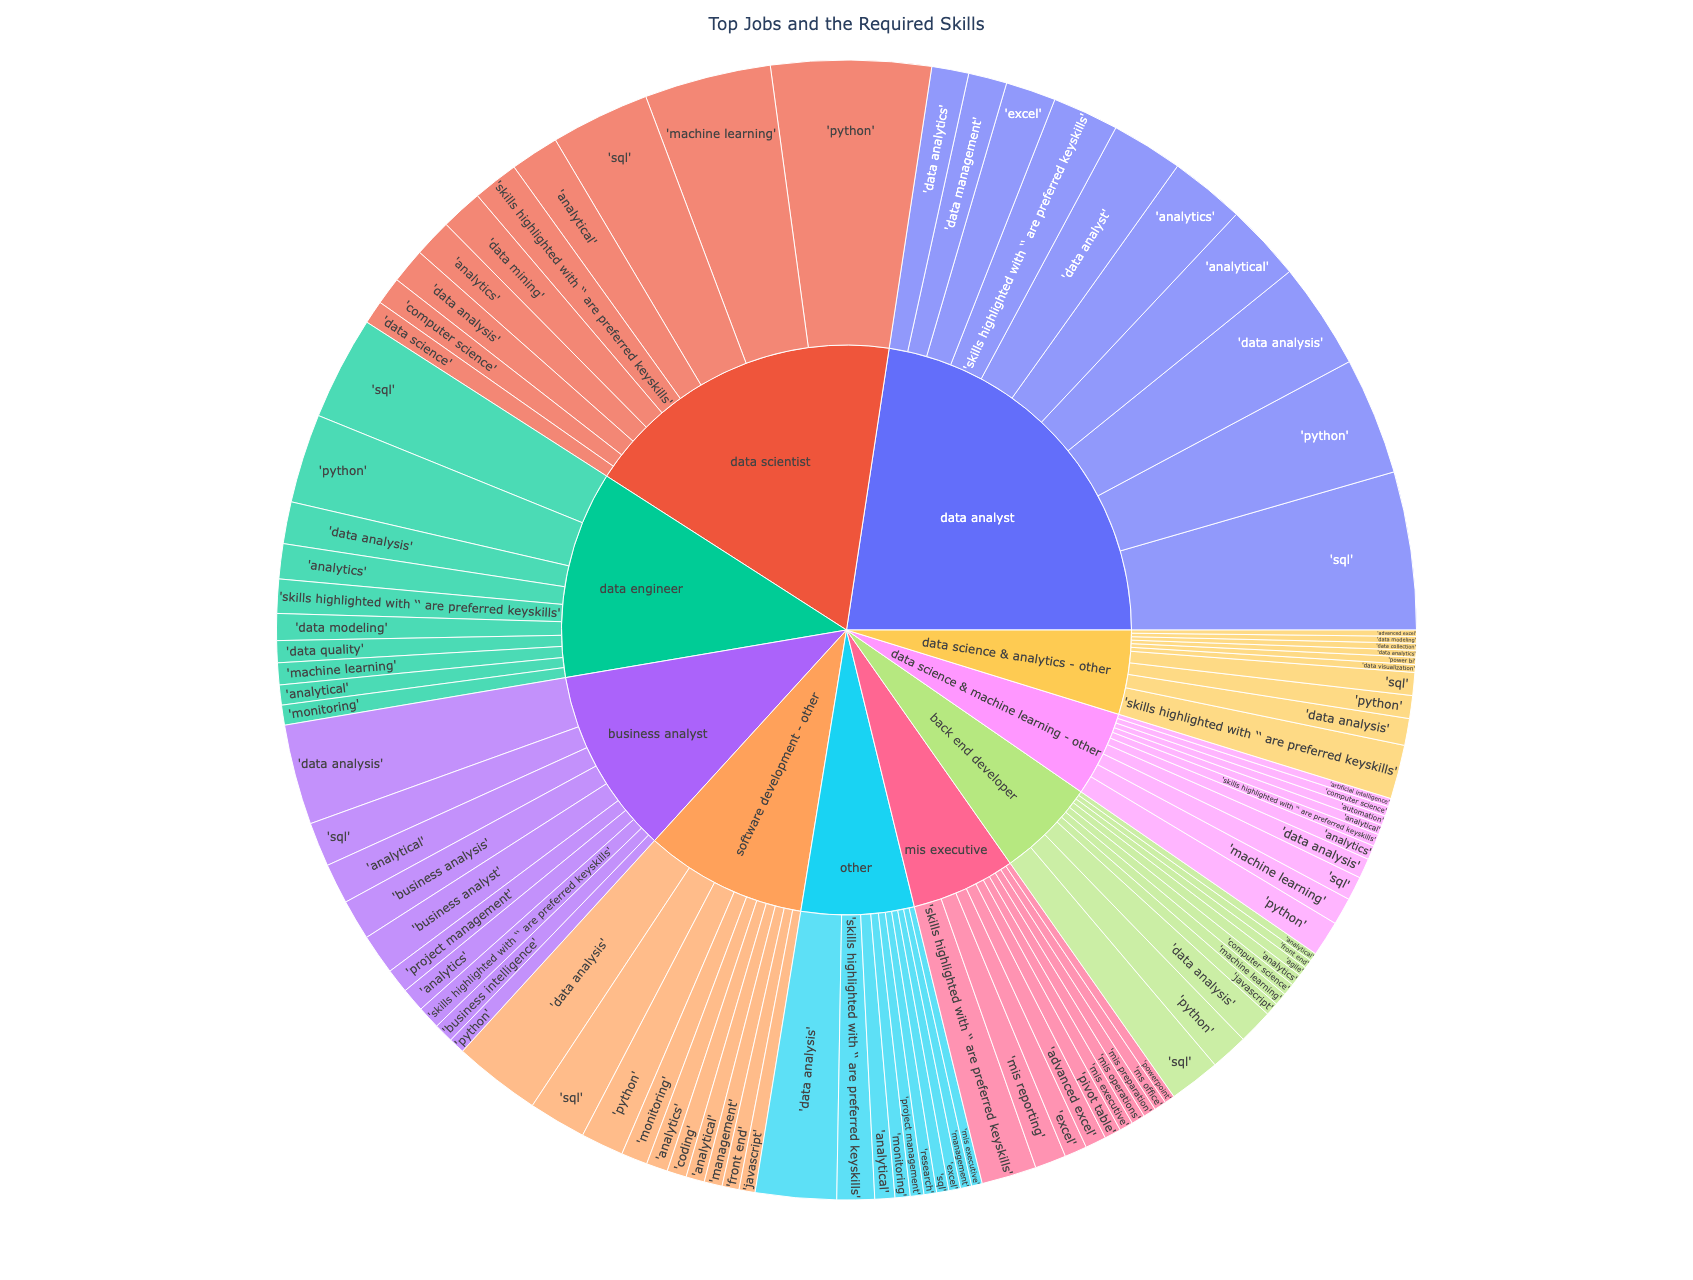

In [67]:
# Create an empty DataFrame to store the results
dataframe = pd.DataFrame()

# Assuming you have a DataFrame 'df' and a DataFrame 'job_10' with job roles
for job in dfs['role_most_job_10']['Job Role']:
    
    # Filter the DataFrame by job role
    df1 = df[df['role'] == job]
    # percentage = dfs['Role_job_10'][dfs['Role_job_10']['Job Role'] == job]
    
    # Extract and preprocess the skills from the 'Skills/Description' column
    skill = [re.sub(r'\[|\]', '', skill) for skills in df1['key_skills_seperated'] for skill in skills.split(', ') ]
    
    # Calculate the frequency distribution of skills
    fdist = FreqDist(skill)
    
    # Create a DataFrame from the frequency distribution
    fdist_df = pd.DataFrame(list(dict(fdist).items()), columns=['skill', 'count'])
    
    
    # Sort the DataFrame by skill count in descending order and select the top 10 skills
    fdist_df = fdist_df.sort_values(by='count', ascending=False)[:10]
    
    # Assign the job role to the DataFrame
    fdist_df = fdist_df.assign(job=job)
    fdist_df['percentage'] = fdist_df['count']/sum(fdist_df['count'])
    
    # Append the results to the main DataFrame
    dataframe = pd.concat([dataframe, fdist_df], ignore_index=True)
    # dataframe = dataframe.concat(fdist_df)

# Create a sunburst chart
fig = px.sunburst(dataframe,
                  path=['job', 'skill'],
                  values='count'
                 )

fig.update_layout(
    autosize=False,
    title_text='Top Jobs and the Required Skills',
    title_x=0.5,
    width=1280,
    height=1280
)

# Display the figure
fig.show()

## Analysis 2

In [70]:
df.head()

Job Title:        Job Location:  \
0                         senior. data scientist  bangalore/bengaluru   
1                              software engineer  bangalore/bengaluru   
2                      data analyst - wealthtech         mumbai, pune   
3  project associate - public health and csenior                 pune   
4                     senior marketing executive  bangalore/bengaluru   

  Job Experience                               key_skills_seperated  \
0  10 - 15 years  ['unix', 'linux', 'staffing', 'time management...   
1    2 - 4 years  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2    3 - 7 years  ['skills highlighted with ‘‘ are preferred key...   
3    1 - 2 years  ['data analysis', 'leadership development', 'c...   
4    1 - 4 years  ['data analysis', 'web analytics', 'social med...   

  applicants_count  Average Experience (years)      Single Location  \
0               39                        12.5  bangalore/bengaluru   
1              118                         3.0  bangalore/bengaluru   
2             1161                         5.0                 None   
3              165                         1.5                 pune   
4               96                         2.5  bangalore/bengaluru   

  Mixed Locations                          ug                     pg  \
0            None                any graduate       any postgraduate   
1            None                any graduate       any postgraduate   
2    mumbai, pune                any graduate    mba/pgdm in finance   
3            None                any graduate       any postgraduate   
4            None  b.b.a/ b.m.s in management  mba/pgdm in marketing   

                doctorate                  role             industry type  \
0                     NaN        data scientist    recruitment / staffing   
1                     NaN  full stack developer  it services & consulting   
2  doctorate not required          data analyst     management consulting   
3                     NaN                 other     management consulting   
4                     NaN     marketing manager                  internet   

                    department       employment type  \
0     data science & analytics  full time, permanent   
1  engineering - software & qa  full time, permanent   
2     data science & analytics  full time, permanent   
3                        other  full time, permanent   
4    marketing & communication  full time, permanent   

                       role category  
0    data science & machine learning  
1               software development  
2  business intelligence & analytics  
3                              other  
4                          marketing

In [71]:
title_experience_stats = df[['Job Title:', 'Average Experience (years)']]

In [72]:
# Analysis 1 : Analyze and display the top 10 job titles with the highest average experience, 
# which indicate deviations or unusual requirements in job postings compared to the common trend

title_experience_stats = title_experience_stats.sort_values(by='Average Experience (years)', ascending=False)

# Extracting the top 10 job titles and average experience
top_10_data = title_experience_stats[['Job Title:', 'Average Experience (years)']].head(10)

print(f"{'Job Title':<70}{'Avg years'}")
print('-' * 80)  
for row in top_10_data.iterrows():
    _, data = row
    job_title, avg_experience = data
    print(f"{job_title:<70}{avg_experience}")


Job Title                                                             Avg years
--------------------------------------------------------------------------------
technical and analytics head                                          25.0
technical and analytics head                                          25.0
amazing opening for quality head for leading manufacturing industry   23.0
amazing opening for quality head for leading manufacturing industry   23.0
urgently looking for vp- risk & control operations                    23.0
head - sap s/4 hana & it                                              22.5
chief financial officer                                               22.5
chief financial officer                                               22.5
general manager operations                                            21.0
director, construction systems                                        20.5


#### Generally, the common average experience requirement for jobs in the data science field falls within the range of 3 to 4.5 years. However we identified some job titles that deviate significantly from this common trend, demanding exceptionally high levels of experience. These job titles have an average experience requirement that exceeds 20 years, indicating unusual and specialized criteria.

In [73]:
df

Job Title:        Job Location:  \
0                            senior. data scientist  bangalore/bengaluru   
1                                 software engineer  bangalore/bengaluru   
2                         data analyst - wealthtech         mumbai, pune   
3     project associate - public health and csenior                 pune   
4                        senior marketing executive  bangalore/bengaluru   
...                                             ...                  ...   
8969                            procurement manager              chennai   
8970      data visualization analyst - trai , delhi          delhi / ncr   
8972                                  mis executive              gurgaon   
8974                                        manager     gurgaon/gurugram   
8975    senior. process associate - purchase to pay  bangalore/bengaluru   

     Job Experience                               key_skills_seperated  \
0     10 - 15 years  ['unix', 'linux', 'staffing', 'time management...   
1       2 - 4 years  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2       3 - 7 years  ['skills highlighted with ‘‘ are preferred key...   
3       1 - 2 years  ['data analysis', 'leadership development', 'c...   
4       1 - 4 years  ['data analysis', 'web analytics', 'social med...   
...             ...                                                ...   
8969    5 - 8 years  ['skills highlighted with ‘‘ are preferred key...   
8970   6 - 11 years  ['skills highlighted with ‘‘ are preferred key...   
8972    0 - 2 years  ['bpoaccountancy', 'tally', 'analytical', 'bac...   
8974   7 - 11 years  ['valuation analysis', 'data analysis', 'inter...   
8975    2 - 3 years  ['process associate', 'automationdata scienced...   

     applicants_count  Average Experience (years)      Single Location  \
0                  39                        12.5  bangalore/bengaluru   
1                 118                         3.0  bangalore/bengaluru   
2                1161                         5.0                 None   
3                 165                         1.5                 pune   
4                  96                         2.5  bangalore/bengaluru   
...               ...                         ...                  ...   
8969              555                         6.5              chennai   
8970              238                         8.5          delhi / ncr   
8972              829                         1.0              gurgaon   
8974              246                         9.0     gurgaon/gurugram   
8975               71                         2.5  bangalore/bengaluru   

     Mixed Locations                                                 ug  \
0               None                                       any graduate   
1               None                                       any graduate   
2       mumbai, pune                                       any graduate   
3               None                                       any graduate   
4               None                         b.b.a/ b.m.s in management   
...              ...                                                ...   
8969            None  b.sc in any specialization, b.b.a/ b.m.s in an...   
8970            None                  b.tech/b.e. in any specialization   
8972            None                                       any graduate   
8974            None                                       any graduate   
8975            None                                       any graduate   

                                                     pg  \
0                                      any postgraduate   
1                                      any postgraduate   
2                                   mba/pgdm in finance   
3                                      any postgraduate   
4                                 mba/pgdm in marketing   
...                                                 ...   
8969                                

In [74]:
df = pd.read_csv("Cleaned_Data.csv")

In [75]:
df

Job Title:        Job Location:  \
0                            senior. data scientist  bangalore/bengaluru   
1                                 software engineer  bangalore/bengaluru   
2                         data analyst - wealthtech         mumbai, pune   
3     project associate - public health and csenior                 pune   
4                        senior marketing executive  bangalore/bengaluru   
...                                             ...                  ...   
8111                            procurement manager              chennai   
8112      data visualization analyst - trai , delhi          delhi / ncr   
8113                                  mis executive              gurgaon   
8114                                        manager     gurgaon/gurugram   
8115    senior. process associate - purchase to pay  bangalore/bengaluru   

     Job Experience                               key_skills_seperated  \
0     10 - 15 years  ['unix', 'linux', 'staffing', 'time management...   
1       2 - 4 years  ['query', 'silverlight', 'sql', 'ssrsjavascrip...   
2       3 - 7 years  ['skills highlighted with ‘‘ are preferred key...   
3       1 - 2 years  ['data analysis', 'leadership development', 'c...   
4       1 - 4 years  ['data analysis', 'web analytics', 'social med...   
...             ...                                                ...   
8111    5 - 8 years  ['skills highlighted with ‘‘ are preferred key...   
8112   6 - 11 years  ['skills highlighted with ‘‘ are preferred key...   
8113    0 - 2 years  ['bpoaccountancy', 'tally', 'analytical', 'bac...   
8114   7 - 11 years  ['valuation analysis', 'data analysis', 'inter...   
8115    2 - 3 years  ['process associate', 'automationdata scienced...   

     applicants_count  Average Experience (years)      Single Location  \
0                  39                        12.5  bangalore/bengaluru   
1                 118                         3.0  bangalore/bengaluru   
2                1161                         5.0                  NaN   
3                 165                         1.5                 pune   
4                  96                         2.5  bangalore/bengaluru   
...               ...                         ...                  ...   
8111              555                         6.5              chennai   
8112              238                         8.5          delhi / ncr   
8113              829                         1.0              gurgaon   
8114              246                         9.0     gurgaon/gurugram   
8115               71                         2.5  bangalore/bengaluru   

     Mixed Locations                                                 ug  \
0                NaN                                       any graduate   
1                NaN                                       any graduate   
2       mumbai, pune                                       any graduate   
3                NaN                                       any graduate   
4                NaN                         b.b.a/ b.m.s in management   
...              ...                                                ...   
8111             NaN  b.sc in any specialization, b.b.a/ b.m.s in an...   
8112             NaN                  b.tech/b.e. in any specialization   
8113             NaN                                       any graduate   
8114             NaN                                       any graduate   
8115             NaN                                       any graduate   

                                                     pg  \
0                                      any postgraduate   
1                                      any postgraduate   
2                                   mba/pgdm in finance   
3                                      any postgraduate   
4                                 mba/pgdm in marketing   
...                                                 ...   
8111                                

In [86]:
all_skills = []
for skills_list in filtered_df_da_ds['key_skills_seperated']:
    # Convert the string representation of list to an actual list if necessary
    if isinstance(skills_list, str):
        skills_list = eval(skills_list)
    all_skills.extend(skills_list)

# Count the occurrences of each skill
skill_counts = Counter(all_skills)

# Convert to DataFrame for better readability
skill_counts_df = pd.DataFrame.from_dict(skill_counts, orient='index', columns=['count'])
skill_counts_df = skill_counts_df.reset_index().rename(columns={'index': 'skill'})
skill_counts_df = skill_counts_df.sort_values(by='count', ascending=False)

# Display the DataFrame
print(skill_counts_df)

# Display the most common and least common values
most_common_values = skill_counts_df.head()
least_common_values = skill_counts_df.tail()

print("Most common skills:")
print(most_common_values)
print("\nLeast common skills:")
print(least_common_values)


                                                  skill  count
8                                                python    578
13                                                  sql    549
10                                        data analysis    357
22                                     machine learning    329
9     skills highlighted with ‘‘ are preferred keysk...    315
...                                                 ...    ...
1336                            junior business analyst      1
1335                         generative aitext semantic      1
1334                                    language models      1
390                           healthcaremedical records      1
2372                                          jiracisco      1

[2373 rows x 2 columns]
Most common skills:
                                                skill  count
8                                              python    578
13                                                sql    549
10              

In [77]:
most_common_values

Most Common Skills:
': 21066
 : 17890
a: 17031
e: 13605
i: 12859
n: 12084
t: 11690
s: 11213
,: 9152
l: 9091

Least Common Skills:
#: 1
7: 1
): 2
(: 2
&: 2
9: 2
5: 3
1: 3
4: 4
